In [1]:
import pandas as pd
import numpy as np

In [2]:
student=pd.read_csv('data/student-mat.csv')

In [3]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [4]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
student['school'].unique()

array(['GP', 'MS'], dtype=object)

In [8]:
student['sex'].unique()

array(['F', 'M'], dtype=object)

In [10]:
student['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [12]:
student['sex'] = student['sex'].astype('category')

In [13]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null category
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 

In [16]:
students_count = pd.crosstab(student['school'],student['sex'], margins = True)

In [18]:
students_count.loc['GP','M']

166

In [20]:
students_count.iloc[0,1]

166

In [22]:
students_count['M']['GP']

166

In [23]:
df_mfa = pd.crosstab(student['school'],[student['address'],student['sex']])
df_mfa

address   R        U     
sex       F   M    F    M
school                   
GP       31  32  152  134
MS       13  12   12    9

In [26]:
df_mfa['U']['F']['GP']

152

In [38]:
df_mfa.iloc[0,2]

152

In [50]:
df_mfa.iloc[0]

address  sex
R        F       31
         M       32
U        F      152
         M      134
Name: GP, dtype: int64

In [40]:
df_mfa

address   R        U     
sex       F   M    F    M
school                   
GP       31  32  152  134
MS       13  12   12    9

In [46]:
df_mfa.loc['GP','U']['F']

152

In [47]:
df_mfa_2 = pd.crosstab([student['school'],student['sex']], student['address'], margins = True)
df_mfa_2

address      R    U  All
school sex              
GP     F    31  152  183
       M    32  134  166
MS     F    13   12   25
       M    12    9   21
All         88  307  395

In [55]:
df_mfa_2['U']['GP']['F']

152

In [70]:
pd.crosstab(student['goout'],[student['Dalc'],student['Walc']])

Dalc    1                2                3           4           5
Walc    1   2   3  4  5  1  2   3   4  5  2  3  4  5  2  3  4  5  5
goout                                                              
1      15   3   1  1  0  0  1   1   0  0  0  0  1  0  0  0  0  0  0
2      53  20   6  2  0  1  8   5   2  0  0  1  2  0  1  0  0  1  1
3      47  30  19  2  1  0  7  13   2  0  0  2  3  1  0  1  0  0  2
4      26   7   9  8  0  0  2   9  11  1  0  4  2  3  0  0  2  2  0
5       9   5   7  2  3  0  0   1   7  4  1  1  3  2  0  0  1  1  6

In [71]:
pd.crosstab(student['school'],[student['sex'],student['traveltime']],margins = True)

sex           F               M             All
traveltime    1   2   3  4    1   2   3  4     
school                                         
GP          130  44   8  1  113  40   7  6  349
MS            9  11   4  1    5  12   4  0   46
All         139  55  12  2  118  52  11  6  395

In [72]:
pd.crosstab([student['school'],student['address']],
            [student['sex'],student['traveltime']],
           rownames = ['Escuela','Tipo_vivienda'],
           colnames = ['Sexo','Tiempo_traslado'])

Sexo                     F             M          
Tiempo_traslado          1   2  3  4   1   2  3  4
Escuela Tipo_vivienda                             
GP      R               15  14  2  0  15   9  4  4
        U              115  30  6  1  98  31  3  2
MS      R                4   4  4  1   1   7  4  0
        U                5   7  0  0   4   5  0  0

In [73]:
pd.crosstab(student['sex'], student['higher'])

higher,no,yes
sex,,
F,4,204
M,16,171


In [78]:
pd.crosstab(student['sex'], student['higher'])

higher,no,yes
sex,,
F,4,204
M,16,171


In [79]:
pd.crosstab(student['sex'], student['higher'],
           values = student['G3'], aggfunc = np.mean, margins = True)

higher,no,yes,All
sex,,,
F,7.7500,10.009804,9.966346
M,6.5625,11.321637,10.914439
All,6.8000,10.608000,10.415190


In [80]:
import pandas as pd
import seaborn as sns

In [81]:
df_tips = sns.load_dataset('tips')

In [84]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [85]:
pd.crosstab(index = df_tips['day'], columns = [])

,__dummy__
day,
Thur,62
Fri,19
Sat,87
Sun,76


In [86]:
pd.crosstab(index = df_tips['day'], columns = df_tips['sex'])

sex,Male,Female
day,,
Thur,30,32
Fri,10,9
Sat,59,28
Sun,58,18


In [87]:
pd.crosstab(index = df_tips['day'], columns = df_tips['sex']).rename(columns ={'Male':'hombre',
                                                                              'Female':'mujer'})

sex,hombre,mujer
day,,
Thur,30,32
Fri,10,9
Sat,59,28
Sun,58,18


In [93]:
pd.crosstab(index=df_tips['day'], 
            columns=df_tips['sex'], 
            colnames=['gender']).unstack().reset_index()

,gender,day,0
0,Male,Thur,30
1,Male,Fri,10
2,Male,Sat,59
3,Male,Sun,58
4,Female,Thur,32
5,Female,Fri,9
6,Female,Sat,28
7,Female,Sun,18


In [94]:
pd.crosstab(index=df_tips['day'], columns =df_tips['sex'], values = df_tips['total_bill'], colnames = ['gender'],
           aggfunc = 'mean')

gender,Male,Female
day,,
Thur,18.714667,16.715312
Fri,19.857000,14.145556
Sat,20.802542,19.680357
Sun,21.887241,19.872222


In [95]:
orange = sns.light_palette('orange', as_cmap = True) #se definiio paleta de colores naranja
pd.crosstab(index=[df_tips['day'], df_tips['sex']], 
            columns=[df_tips['time'], df_tips['size']], 
            colnames=['meal', 'party_people_size']).rename(columns={"Lunch": "count_lunch_meals_served", "Dinner": "count_dinner_meals_served"}).style.background_gradient(cmap=orange)
                                                                                                                                                 #Usando degradado                                       

In [96]:
sales = pd.read_excel('data\sales-funnel.xlsx')

In [97]:
sales

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won


In [99]:
pd.pivot_table(sales, index = ['Name'])

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [100]:
pd.pivot_table(sales, index = ['Name','Rep','Manager'])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [102]:
pd.pivot_table(sales, index = ['Manager','Rep','Name']).loc['Debra Henley']

Account  Price  Quantity
Rep           Name                                                  
Craig Booker  Fritsch, Russel and Anderson   737550  35000  1.000000
              Trantow-Barrows                714466  15000  1.333333
Daniel Hilton Kiehn-Spinka                   146832  65000  2.000000
              Kulas Inc                      218895  25000  1.500000
John Smith    Barton LLC                     740150  35000  1.000000
              Jerde-Hilpert                  412290   5000  2.000000

In [108]:
pd.pivot_table(sales, index = ['Manager','Rep','Name'], values = ['Price','Quantity'])

Price  Quantity
Manager       Rep           Name                                          
Debra Henley  Craig Booker  Fritsch, Russel and Anderson   35000  1.000000
                            Trantow-Barrows                15000  1.333333
              Daniel Hilton Kiehn-Spinka                   65000  2.000000
                            Kulas Inc                      25000  1.500000
              John Smith    Barton LLC                     35000  1.000000
                            Jerde-Hilpert                   5000  2.000000
Fred Anderson Cedric Moss   Herman LLC                     65000  2.000000
                            Purdy-Kunde                    30000  1.000000
                            Stokes LLC                      7500  1.000000
              Wendy Yule    Kassulke, Ondricka and Metz     7000  3.000000
                            Keeling LLC                   100000  5.000000
                            Koepp Ltd                      35000  2.000000

In [107]:
sales[(sales['Manager'] == 'Debra Henley') & (sales['Rep'] == 'Craig Booker')]

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined


In [110]:
sales[(sales['Manager'] == 'Debra Henley') & (sales['Rep'] == 'Daniel Hilton')]

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented


In [109]:
pd.pivot_table(sales, index = ['Manager','Rep'], values = 'Price', aggfunc = [sum,len])

sum   len
                              Price Price
Manager       Rep                        
Debra Henley  Craig Booker    80000     4
              Daniel Hilton  115000     3
              John Smith      40000     2
Fred Anderson Cedric Moss    110000     4
              Wendy Yule     177000     4

In [120]:
pd.pivot_table(sales, index = ['Manager','Rep'], 
               values = ['Price','Quantity'], 
               aggfunc={'Price':'mean','Quantity':'sum'}).rename(columns = {'Price':'Precio_promedio','Quantity':'Cantidad'})
              #columns = {'Price':'Precio_promedio','Quantity':'Cantidad'})

Precio_promedio  Cantidad
Manager       Rep                                     
Debra Henley  Craig Booker      20000.000000         5
              Daniel Hilton     38333.333333         5
              John Smith        20000.000000         3
Fred Anderson Cedric Moss       27500.000000         5
              Wendy Yule        44250.000000        12

In [126]:
n = pd.pivot_table(sales, index = ['Manager','Rep','Status'],values = 'Price',
                   columns = ['Product']
                    aggfunc = np.mean, margins = True, fill_value =0)

In [127]:
n

Product                                   CPU  Maintenance  Monitor  Software  \
Manager       Rep           Status                                              
Debra Henley  Craig Booker  declined    35000            0        0         0   
                            pending         0         5000        0         0   
                            presented   30000            0        0     10000   
              Daniel Hilton pending     40000            0        0         0   
                            presented       0            0        0     10000   
                            won         65000            0        0         0   
              John Smith    declined    35000            0        0         0   
                            pending         0         5000        0         0   
Fred Anderson Cedric Moss   pending         0         5000        0         0   
                            presented   30000            0        0     10000   
                            won         65000            0        0         0   
              Wendy Yule    declined    65000            0        0         0   
                            presented       0            0     5000         0   
                            won        100000         7000        0         0   
All                                     51666         5500     5000     10000   

Product                                  All  
Manager       Rep           Status            
Debra Henley  Craig Booker  declined   35000  
                            pending     5000  
                            presented  20000  
              Daniel Hilton pending    40000  
                            presented  10000  
                            won        65000  
              John Smith    declined   35000  
                            pending     5000  
Fred Anderson Cedric Moss   pending     5000  
                            presented  20000  
                            won        65000  
              Wendy Yule    declined   65000  
                            presented   5000  
                            won        53500  
All                                    30705

In [125]:
m = pd.pivot_table(sales, index = ['Manager','Rep','Status'],values = 'Quantity',
                   columns = ['Product'], aggfunc = np.sum, margins = True, fill_value =0)

m

Product                                CPU  Maintenance  Monitor  Software  \
Manager       Rep           Status                                           
Debra Henley  Craig Booker  declined     1            0        0         0   
                            pending      0            2        0         0   
                            presented    1            0        0         1   
              Daniel Hilton pending      2            0        0         0   
                            presented    0            0        0         1   
                            won          2            0        0         0   
              John Smith    declined     1            0        0         0   
                            pending      0            2        0         0   
Fred Anderson Cedric Moss   pending      0            1        0         0   
                            presented    1            0        0         1   
                            won          2            0        0         0   
              Wendy Yule    declined     2            0        0         0   
                            presented    0            0        2         0   
                            won          5            3        0         0   
All                                     17            8        2         3   

Product                                All  
Manager       Rep           Status          
Debra Henley  Craig Booker  declined     1  
                            pending      2  
                            presented    2  
              Daniel Hilton pending      2  
                            presented    1  
                            won          2  
              John Smith    declined     1  
                            pending      2  
Fred Anderson Cedric Moss   pending      1  
                            presented    2  
                            won          2  
              Wendy Yule    declined     2  
                            presented    2  
                            won          8  
All                                     30

In [128]:
final = pd.pivot_table(sales, index = ['Manager','Status'],
                columns =['Product'],
                values = ['Price','Quantity'],
                aggfunc = {'Price':np.sum,'Quantity':len}, fill_value =0)
final

Price                              Quantity  \
Product                     CPU Maintenance Monitor Software      CPU   
Manager       Status                                                    
Debra Henley  declined    70000           0       0        0        2   
              pending     40000       10000       0        0        1   
              presented   30000           0       0    20000        1   
              won         65000           0       0        0        1   
Fred Anderson declined    65000           0       0        0        1   
              pending         0        5000       0        0        0   
              presented   30000           0    5000    10000        1   
              won        165000        7000       0        0        2   

                                                      
Product                 Maintenance Monitor Software  
Manager       Status                                  
Debra Henley  declined            0       0        0  
              pending             2       0        0  
              presented           0       0        2  
              won                 0       0        0  
Fred Anderson declined            0       0        0  
              pending             1       0        0  
              presented           0       1        1  
              won                 1       0        0

In [129]:
titanic = sns.load_dataset('titanic')

In [130]:
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [131]:
pd.crosstab(titanic.sex,titanic.survived)

survived,0,1
sex,,
female,81,233
male,468,109


In [132]:
titanic.pivot_table('survived', index = 'sex',columns = 'class') #llamando pivot table desde el dataframe

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [133]:
pd.pivot_table(titanic, index = 'sex', columns = 'class', values = 'survived') #llamando pivot table desde pandas as pd

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [136]:
age = pd.cut(titanic['age'],[0,18,80])

In [137]:
titanic.pivot_table('survived',index = ['sex',age], columns = 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [138]:
fare = pd.qcut(titanic['fare'], 3)
fare

0      (-0.001, 8.662]
1      (26.0, 512.329]
2      (-0.001, 8.662]
3      (26.0, 512.329]
4      (-0.001, 8.662]
            ...       
886      (8.662, 26.0]
887    (26.0, 512.329]
888      (8.662, 26.0]
889    (26.0, 512.329]
890    (-0.001, 8.662]
Name: fare, Length: 891, dtype: category
Categories (3, interval[float64]): [(-0.001, 8.662] < (8.662, 26.0] < (26.0, 512.329]]

In [140]:
titanic.pivot_table('survived',columns= [fare,'class'], index = ['sex',age], aggfunc= np.sum)

fare            (-0.001, 8.662]       (8.662, 26.0]               \
class                     First Third         First Second Third   
sex    age                                                         
female (0, 18]              NaN   7.0           NaN    7.0  14.0   
       (18, 80]             NaN  11.0           2.0   43.0  13.0   
male   (0, 18]              NaN   3.0           NaN    5.0   7.0   
       (18, 80]             0.0  20.0           0.0    6.0   4.0   

fare            (26.0, 512.329]               
class                     First Second Third  
sex    age                                    
female (0, 18]             10.0    7.0   1.0  
       (18, 80]            70.0   11.0   1.0  
male   (0, 18]              4.0    4.0   1.0  
       (18, 80]            36.0    0.0   3.0

In [141]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [142]:
import matplotlib.pyplot as plt

# Plots

In [146]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2000',periods = 1000))
ts

2000-01-01    0.375300
2000-01-02   -0.145730
2000-01-03   -2.363127
2000-01-04   -0.142797
2000-01-05   -0.146098
                ...   
2002-09-22   -0.021466
2002-09-23    0.260194
2002-09-24   -1.216665
2002-09-25   -0.894615
2002-09-26   -0.107443
Freq: D, Length: 1000, dtype: float64

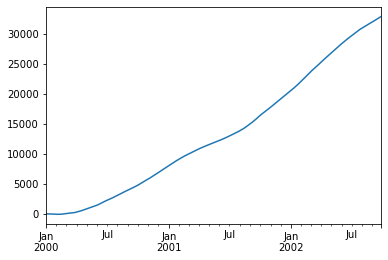

In [145]:
ts = ts.cumsum()
ts.plot();

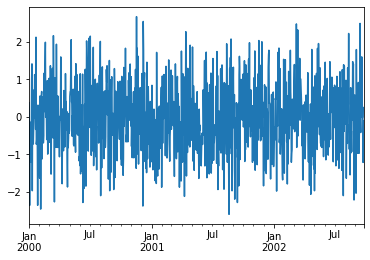

In [147]:
ts.plot();

In [148]:
df = pd.DataFrame(np.random.randn(1000,4),index = ts.index, columns = list('ABCD'))
df = df.cumsum()
df

,A,B,C,D
2000-01-01,-0.078212,-1.177602,1.353793,-0.302905
2000-01-02,0.872984,-1.529319,1.942144,1.509843
2000-01-03,2.175257,-1.835532,1.592204,0.493252
2000-01-04,1.503106,-1.649085,2.176569,1.282194
2000-01-05,-1.711472,-1.510155,0.999599,3.052345
...,...,...,...,...
2002-09-22,-0.940573,62.152049,-5.200279,51.521952
2002-09-23,-1.102119,61.033829,-7.349938,52.216277
2002-09-24,0.401768,60.288284,-8.993641,52.862947
2002-09-25,1.963011,61.591940,-8.911681,52.060310


<AxesSubplot:>

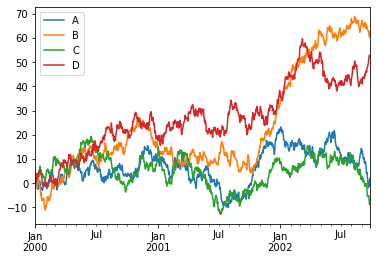

In [152]:
df.plot()

<AxesSubplot:>

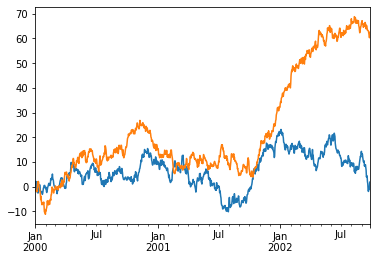

In [154]:
df['A'].plot()
df['B'].plot()

In [151]:
df3 = pd.DataFrame(np.random.randn(1000,2), columns = ['B','C']).cumsum()
df3

,B,C
0,2.213041,-0.048631
1,0.770726,-1.206300
2,-0.511353,-1.104533
3,0.858849,-0.128674
4,1.500270,-0.861548
...,...,...
995,-33.738573,-2.167048
996,-35.432219,-3.822180
997,-35.254190,-4.082136
998,-33.418055,-3.194864


In [155]:
df3 = pd.DataFrame(np.random.randn(1000,2), columns = ['B','C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))
df3

,B,C,A
0,1.577474,-0.120650,0
1,-0.065541,0.182545,1
2,0.898358,-0.401317,2
3,1.251754,-1.052642,3
4,1.051876,-2.087526,4
...,...,...,...
995,12.413444,-5.686414,995
996,13.720714,-4.798128,996
997,11.927512,-4.527533,997
998,12.396690,-4.547023,998


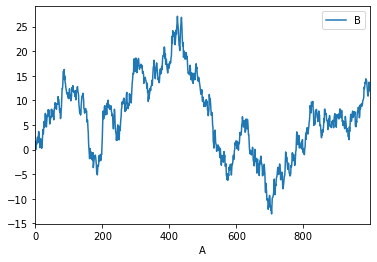

In [157]:
df3.plot(x = 'A', y = 'B');

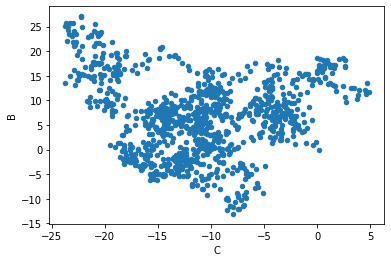

In [161]:
df3.plot(kind = 'scatter', x = 'C', y = 'B');

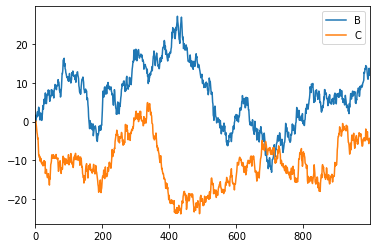

In [162]:
df3[['B','C']].plot(); #plotear sin orden se puede

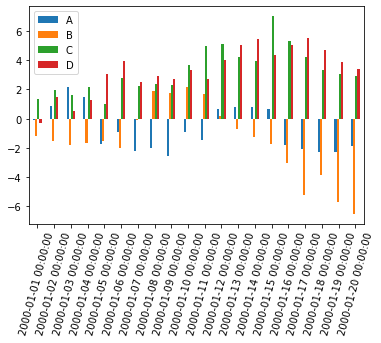

In [166]:
df.iloc[:20].plot(kind = 'bar', rot = (75));

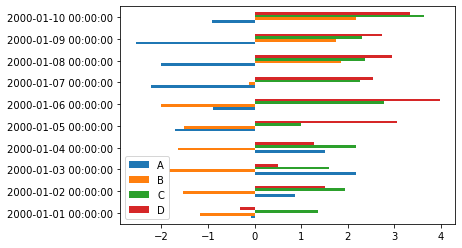

In [167]:
df.iloc[:10].plot(kind = 'barh');

<BarContainer object of 1000 artists>

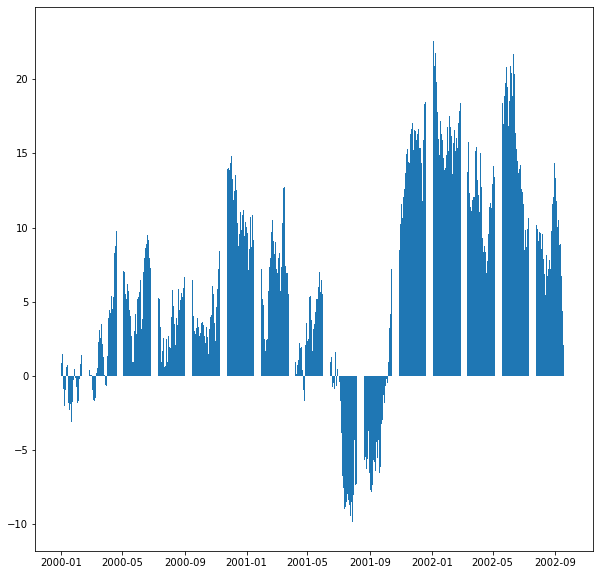

In [171]:
plt.figure(figsize = (10,10))
plt.bar(df.index, height= df['A'])

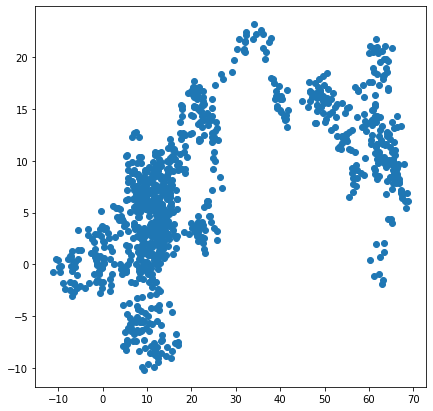

In [172]:
plt.figure(figsize = (7,7)) # Definiendo figura con matplotlib 
#metiendo un plot dentro de esa figura
plt.scatter(df['B'],df['A'])

In [176]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df

,A,B,C,D
2000-01-01,-0.078212,-1.177602,1.353793,-0.302905
2000-01-02,0.872984,-1.529319,1.942144,1.509843
2000-01-03,2.175257,-1.835532,1.592204,0.493252
2000-01-04,1.503106,-1.649085,2.176569,1.282194
2000-01-05,-1.711472,-1.510155,0.999599,3.052345
...,...,...,...,...
2002-09-22,-0.940573,62.152049,-5.200279,51.521952
2002-09-23,-1.102119,61.033829,-7.349938,52.216277
2002-09-24,0.401768,60.288284,-8.993641,52.862947
2002-09-25,1.963011,61.591940,-8.911681,52.060310


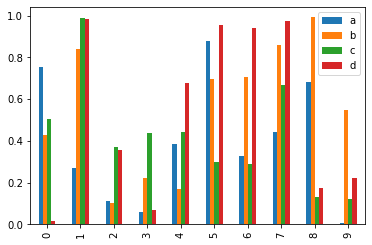

In [175]:
df2.plot(kind='bar');

<AxesSubplot:>

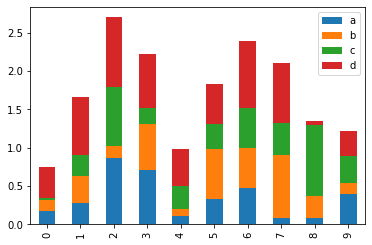

In [177]:
df2.plot.bar(stacked = True) #stacked nos sirve si tenemos categorias tambien

In [179]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
df4

,a,b,c
0,2.231069,2.515223,-3.643994
1,-0.348241,1.846107,0.483991
2,0.567788,-0.926511,1.249135
3,1.105920,0.564250,-0.559437
4,0.801059,0.444330,-1.439823
...,...,...,...
995,0.542125,-0.061112,0.812280
996,0.661798,-0.166516,-0.778033
997,2.858522,-2.642909,-1.921011
998,3.786982,2.355518,0.491243


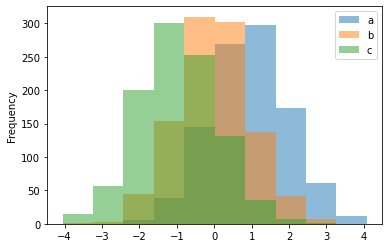

In [183]:
df4.plot.hist(alpha = 0.50);

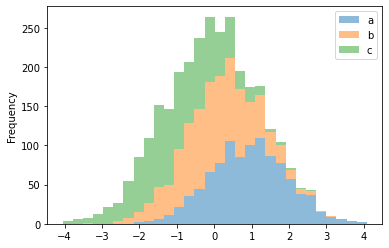

In [184]:
df4.plot.hist(stacked = True, bins= 30,alpha = 0.5);

<AxesSubplot:>

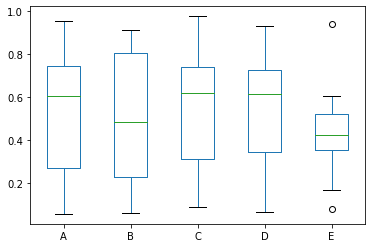

In [185]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box()

In [186]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange',
         'medians': 'DarkBlue', 'caps': 'Gray'}

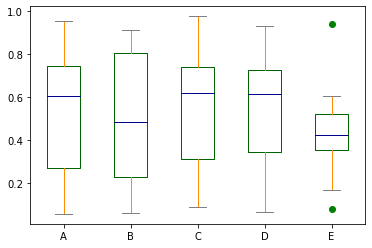

In [187]:
df.plot.box(color=color, sym='go')
plt.savefig('data/box.png'); #salavando plot

![](data/box.png)

In [188]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.007040,0.971737,0.315214,0.909706
1,0.441282,0.819644,0.120035,0.404788
2,0.055090,0.078184,0.654008,0.541490
3,0.816036,0.818927,0.424105,0.255958
4,0.869452,0.381970,0.676256,0.874165
5,0.457202,0.848195,0.285303,0.274164
6,0.927320,0.448555,0.671306,0.749228
7,0.597415,0.708414,0.658423,0.758679
8,0.819876,0.718932,0.767245,0.614225
9,0.861319,0.066210,0.079841,0.960523


<AxesSubplot:>

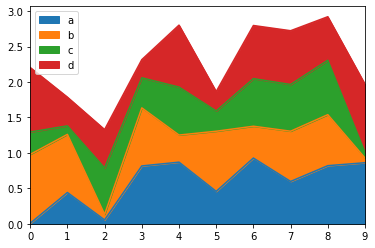

In [189]:
df.plot.area()

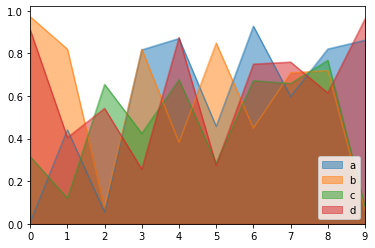

In [190]:
df.plot.area(stacked=False);

In [191]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

In [192]:
df

,a,b,c,d
0,0.067577,0.616081,0.528263,0.892399
1,0.425752,0.806147,0.692080,0.851651
2,0.644105,0.594113,0.195970,0.794678
3,0.628752,0.722652,0.715088,0.948575
4,0.853653,0.023356,0.099137,0.124237
5,0.449446,0.637632,0.603701,0.544247
6,0.490415,0.041119,0.556767,0.190507
7,0.568609,0.313481,0.865712,0.939124
8,0.021667,0.051947,0.690712,0.683082
9,0.868686,0.290608,0.276563,0.931268


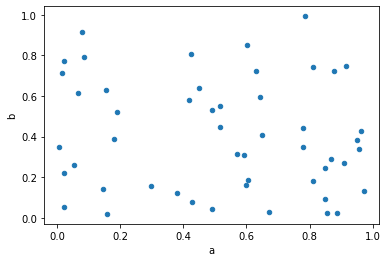

In [193]:
df.plot.scatter(x='a', y='b');

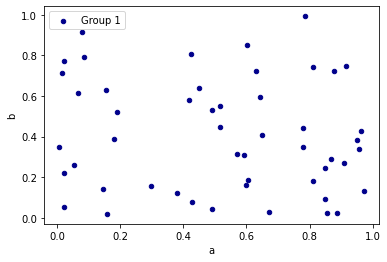

In [194]:
df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');

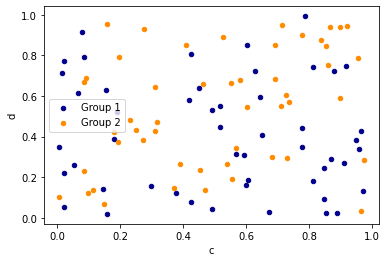

In [195]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1'); #se define una ax que tendra el primer grupo
df.plot.scatter(x='c', y='d', color='DarkOrange', label='Group 2', ax=ax); #se añade un nuevo plot al ax definido

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Gr

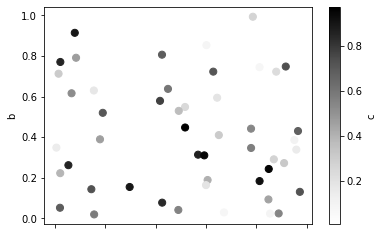

In [196]:
df.plot.scatter(x='a', y='b', c='c', s=50);

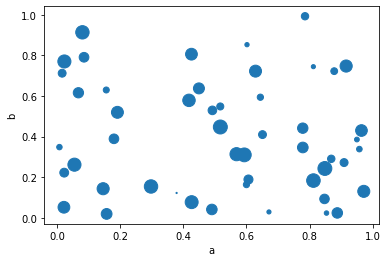

In [197]:
df.plot.scatter(x='a', y='b', s=df['c'] * 200);